<a href="https://colab.research.google.com/github/gpm2003/mestrado_1_semestre1/blob/apc-(aprendizagem-computacional)/apc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## aula pratica 1- implementar a euclidian distance e depois usar a otimização kmeans

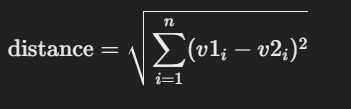

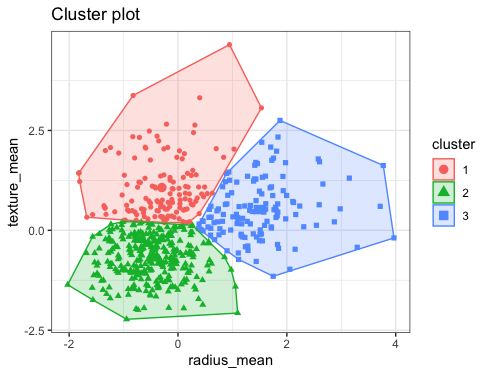


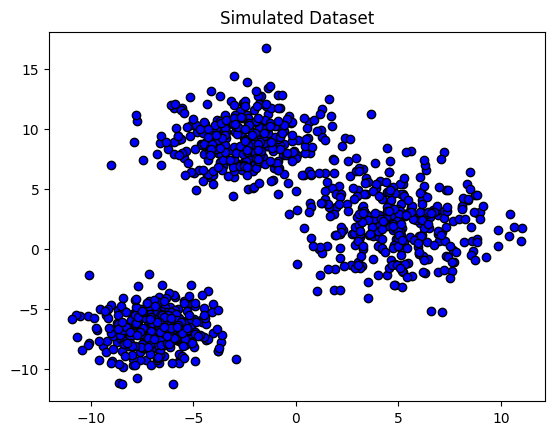

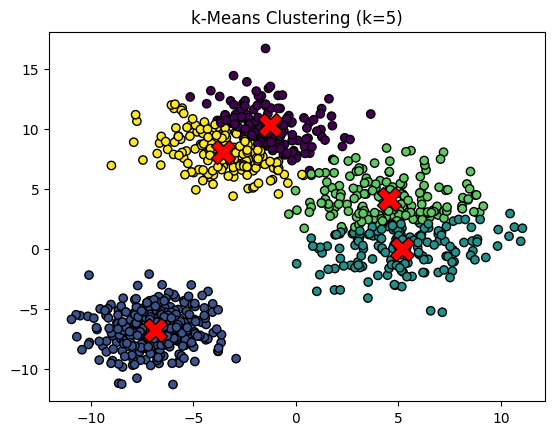

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Simulate the dataset
def simulated_dataset():
    X, _ = datasets.make_blobs(n_samples=1000, cluster_std=[2.0, 2.5, 1.5], random_state=42)
    return X

# MacQueen initialization (custom k-Means init)
def mac_queen_initialisation(X, k):
    centroids = np.zeros((k, X.shape[1]))
    for cc in range(k):
        index = np.random.randint(0, high=X.shape[0])
        centroids[cc] = X[index]
    return centroids

# Euclidean distance function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# k-Means optimization function
def kmeans_optimization(X, k, max_iters=100, tolerance=1e-4):
    # Step 1: Initialize centroids (MacQueen initialization or random)
    centroids = mac_queen_initialisation(X, k)

    for _ in range(max_iters):
        # Step 2: Assign each point to the nearest centroid
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)

        # Step 3: Save old centroids to check convergence
        old_centroids = centroids.copy()

        # Step 4: Update centroids by averaging assigned points
        for idx in range(k):
            if clusters[idx]:  # Avoid division by zero if no points assigned to a cluster
                centroids[idx] = np.mean(clusters[idx], axis=0)

        # Step 5: Check if centroids have converged
        centroid_shift = np.sum([euclidean_distance(old_centroids[i], centroids[i]) for i in range(k)])
        if centroid_shift < tolerance:
            break

    # Step 6: Assign labels based on the nearest centroids
    labels = np.zeros(X.shape[0])
    for idx, point in enumerate(X):
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        labels[idx] = np.argmin(distances)

    return centroids, labels

# Plotting function for results
def plot_kmeans(X, centroids, labels, k):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', edgecolor='k')  # Centroids
    plt.title(f"k-Means Clustering (k={k})")
    plt.show()

# Main function to run the entire process
def main():
    # Simulate the dataset
    X = simulated_dataset()

    # Plot the original dataset (before clustering)
    plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k', marker='o')
    plt.title("Simulated Dataset")
    plt.show()

    # Apply k-Means optimization with k=3
    k = 3
    centroids, labels = kmeans_optimization(X, k)

    # Plot the clustering result
    plot_kmeans(X, centroids, labels, k)

if __name__ == "__main__":
    main()


# **aula pratica 1- Probability and Statistics**
  

exercise 1- In Python, simulate the sum of two random variables, X and Y, both uniformly distributed between 0
and 1.

In Python, simulate the sum of two random variables, X and Y, both uniformly distributed between 0
and 1.

In [ ]:
import numpy as np

# Number of simulations (random samples)
n_samples = 10000

# Simulate X and Y as uniformly distributed random variables between 0 and 1
X = np.random.uniform(0, 1, n_samples)
Y = np.random.uniform(0, 1, n_samples)

# Compute the sum of X and Y
Z = X + Y

# Output a few examples of the simulated sums
print("Some examples of the sum (Z = X + Y):", Z[:10])  # Print the first 10 sums

Some examples of the sum (Z = X + Y): [1.73400634 0.95392675 1.02753372 1.22649177 0.27354645 0.19034889
 0.85096072 1.63613307 0.83425636 1.10204793]


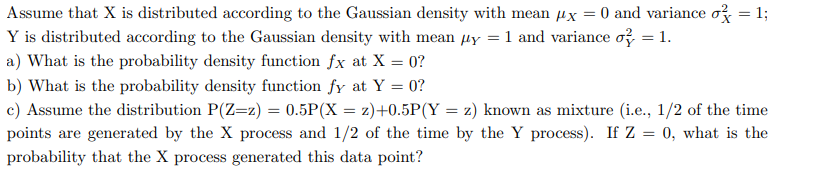

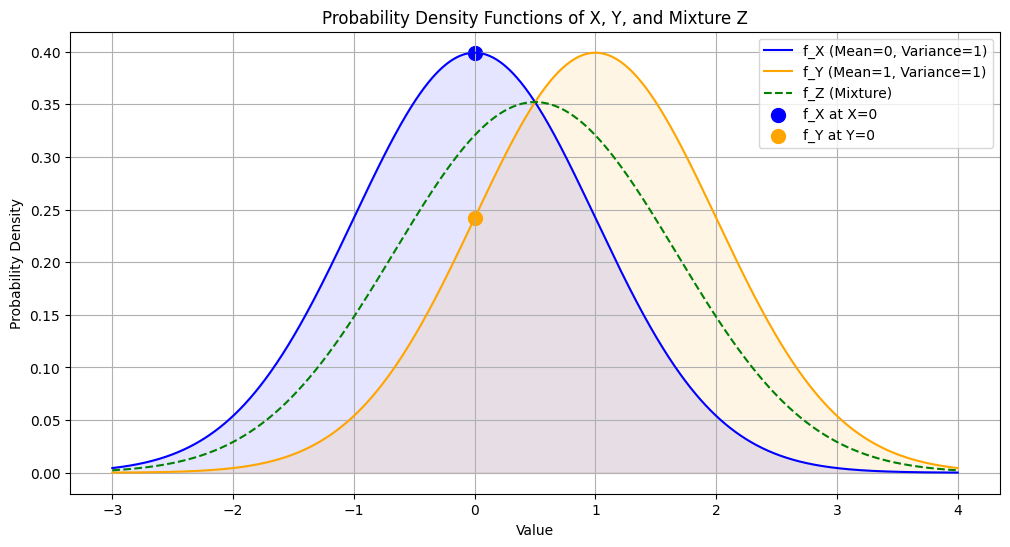

a) Probability density function fX at X = 0: 0.3989
b) Probability density function fY at Y = 0: 0.2420
c) Probability that X generated Z=0: 0.6225


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given parameters for X and Y
mu_X = 0
sigma_X = 1
mu_Y = 1
sigma_Y = 1

# Range for the x values for plotting
x = np.linspace(-3, 4, 1000)

# Probability density function for X
f_X = stats.norm.pdf(x, mu_X, sigma_X)

# Probability density function for Y
f_Y = stats.norm.pdf(x, mu_Y, sigma_Y)

# Mixture distribution
f_Z = 0.5 * f_X + 0.5 * f_Y

# Calculate f_X at X = 0 and f_Y at Y = 0
f_X_at_0 = stats.norm.pdf(0, mu_X, sigma_X)
f_Y_at_0 = stats.norm.pdf(0, mu_Y, sigma_Y)

# Probability of Z=0
P_X = 0.5 * f_X_at_0
P_Y = 0.5 * f_Y_at_0
P_Z_at_0 = P_X + P_Y

# Probability that X generated Z=0
P_X_given_Z = (f_X_at_0 * 0.5) / P_Z_at_0

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Plot f_X
plt.plot(x, f_X, label='f_X (Mean=0, Variance=1)', color='blue')
plt.fill_between(x, f_X, color='blue', alpha=0.1)

# Plot f_Y
plt.plot(x, f_Y, label='f_Y (Mean=1, Variance=1)', color='orange')
plt.fill_between(x, f_Y, color='orange', alpha=0.1)

# Plot f_Z (mixture distribution)
plt.plot(x, f_Z, label='f_Z (Mixture)', color='green', linestyle='--')

# Highlight points at X=0 and Y=0
plt.scatter(0, f_X_at_0, color='blue', marker='o', s=100, label='f_X at X=0')
plt.scatter(0, f_Y_at_0, color='orange', marker='o', s=100, label='f_Y at Y=0')

# Labels and title
plt.title('Probability Density Functions of X, Y, and Mixture Z')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Output results
print(f"a) Probability density function fX at X = 0: {f_X_at_0:.4f}")
print(f"b) Probability density function fY at Y = 0: {f_Y_at_0:.4f}")
print(f"c) Probability that X generated Z=0: {P_X_given_Z:.4f}")


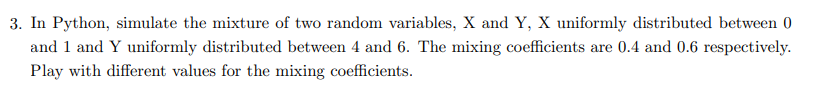

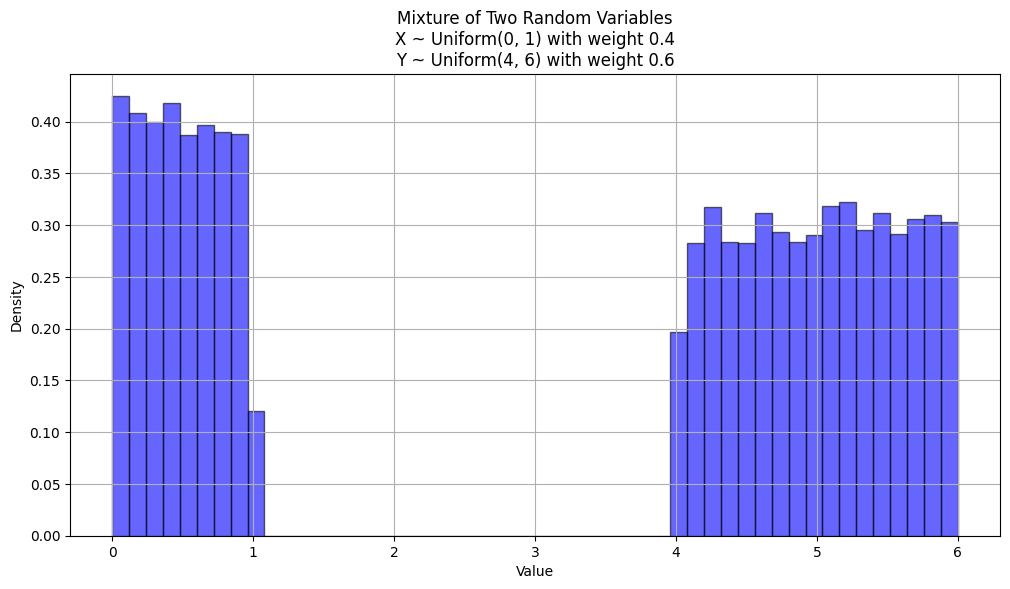

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples to simulate
n_samples = 10000

# Define the mixing coefficients
mixing_coefficient_X = 0.4
mixing_coefficient_Y = 0.6

# Generate samples from the distributions
X = np.random.uniform(0, 1, int(n_samples * mixing_coefficient_X))
Y = np.random.uniform(4, 6, int(n_samples * mixing_coefficient_Y))

# Combine the samples
mixture_samples = np.concatenate((X, Y))

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot histogram of the mixture samples
plt.hist(mixture_samples, bins=50, density=True, alpha=0.6, color='blue', edgecolor='black')

# Customize the plot
plt.title(f'Mixture of Two Random Variables\n'
          f'X ~ Uniform(0, 1) with weight {mixing_coefficient_X}\n'
          f'Y ~ Uniform(4, 6) with weight {mixing_coefficient_Y}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid()
plt.show()


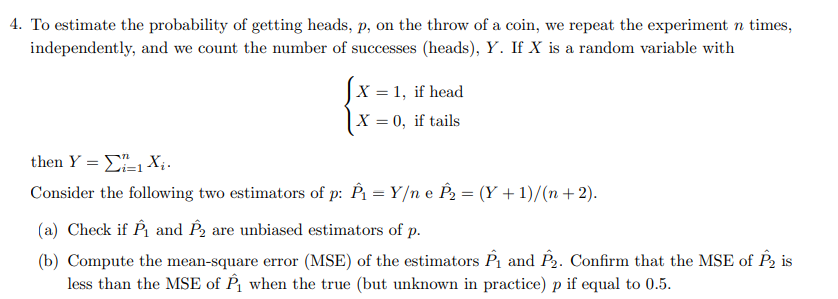

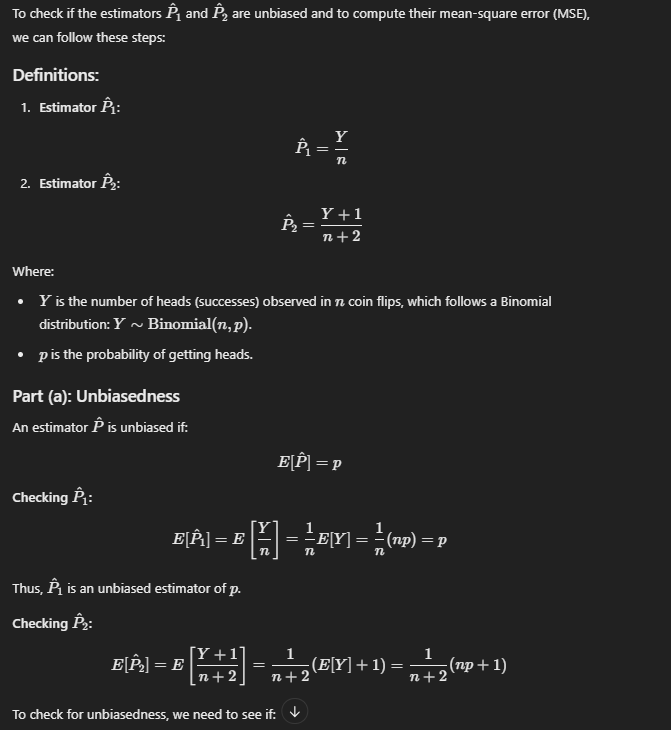
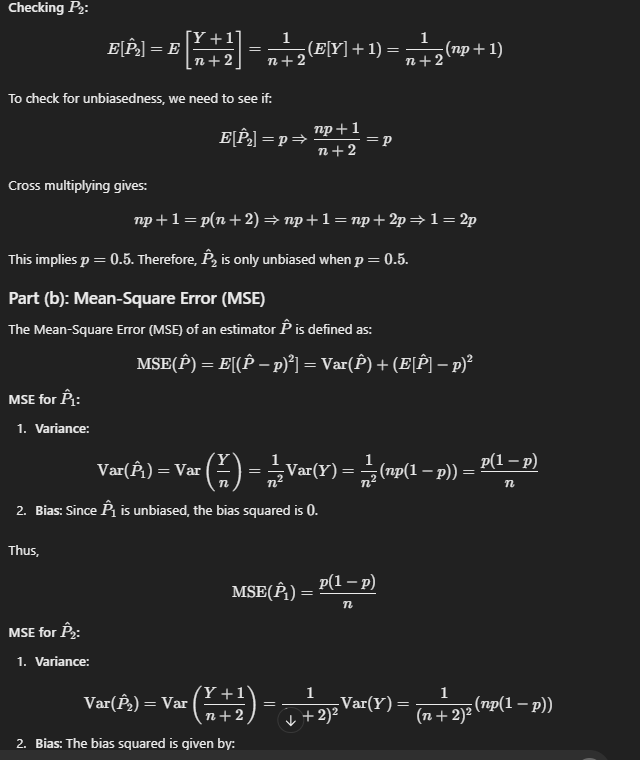
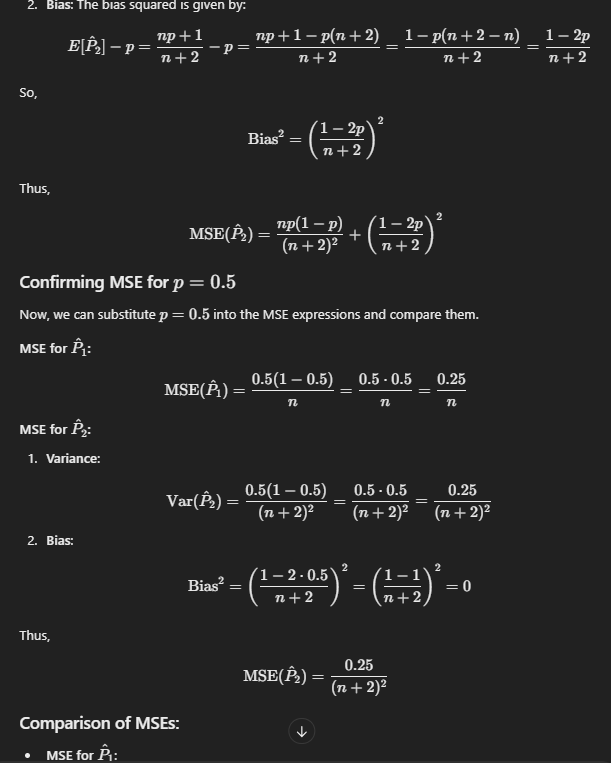
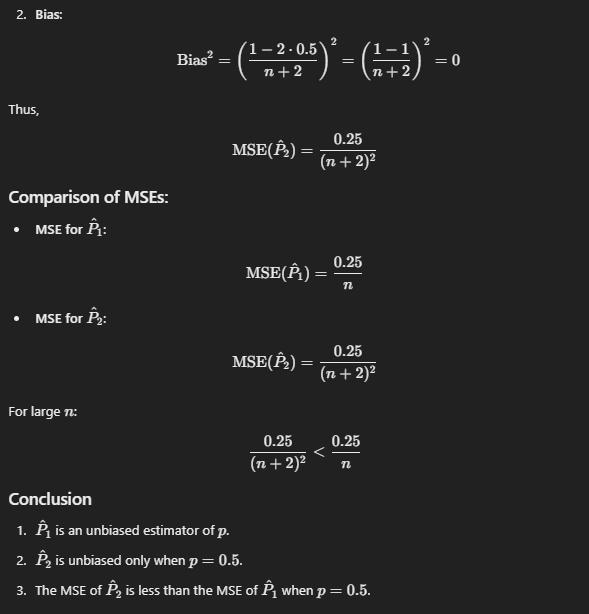

In [ ]:
import numpy as np

def mse_estimators(n, p):
    # MSE for P1
    mse_P1 = 0.25 / n

    # MSE for P2
    mse_P2 = 0.25 / (n + 2)**2  # No bias since bias^2 is 0 for p=0.5

    return mse_P1, mse_P2

# Parameters
n = 100  # number of coin tosses
p = 0.5  # true probability of getting heads

# Calculate MSEs
mse_P1, mse_P2 = mse_estimators(n, p)

# Output results
print(f"MSE of P1: {mse_P1:.6f}")
print(f"MSE of P2: {mse_P2:.6f}")
print(f"MSE of P2 < MSE of P1: {mse_P2 < mse_P1}")


MSE of P1: 0.002500
MSE of P2: 0.000024
MSE of P2 < MSE of P1: True


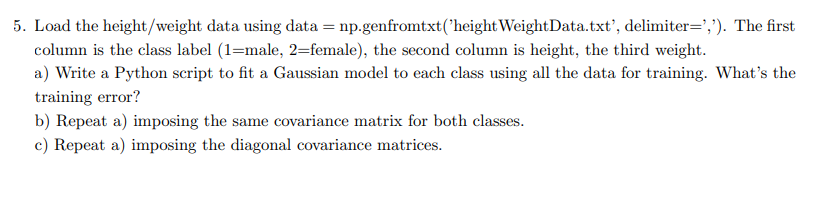

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Load the data
data = np.genfromtxt('heightWeightData.txt', delimiter=',')

# Extract features and labels
X = data[:, 1:3]  # height and weight features
y = data[:, 0]     # class labels (1=male, 2=female)

# Create and fit the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X, y)

# Predict the labels for the training data
y_pred = model.predict(X)

# Calculate the training error
accuracy = accuracy_score(y, y_pred)
training_error = 1 - accuracy  # Training error is 1 - accuracy

# Print the training error
print(f'Training Error: {training_error:.4f}')


FileNotFoundError: heightWeightData.txt not found.

# Nova secção